In [111]:
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
%matplotlib inline


def get_hashtags(sentence):
    split_sentence = sentence.split(" ")
    output = []
    for values in split_sentence:
        if "#" in values:
            output.append(values)
    return output


df = pd.read_csv("train_data.csv")


tweets = df['Tweets']
count_of_words = []
reduced_count_of_words = []
updated_tweets = []

for values in tweets:
    list_of_words = values.split(" ")

            
        
    number_of_words = len(list_of_words)
    
    count_of_words.append(number_of_words)
    reduced_word_count = number_of_words
    new_list = []
    for words in list_of_words: 
        if len(words) == 1:
            reduced_word_count = reduced_word_count - 1
        else:
            new_list.append(words)
    
    reduced_count_of_words.append(reduced_word_count)
    reduced_words = " ".join(new_list)
    updated_tweets.append(reduced_words)
        
df['Number of Words'] = count_of_words
df['Reduced Number of Words'] = reduced_count_of_words
df['Reduced Tweet'] = updated_tweets
df['Number of Characters'] = df['Reduced Tweet'].apply(len)

Reduced_Tweets = df['Reduced Tweet']
reduced = [re.sub("0-0a-zA-Z", "", tweets) for tweets in Reduced_Tweets]

hashtage_list = []
number_of_hashtags = []
for values in reduced:
    #print(values)
    output = get_hashtags(values)
    if len(output) <= 0:
        no_after += 1 
        number_of_hashtags.append(0)
    else:
        yes_after += 1
        number_of_hashtags.append(len(output))
    hashtage_list.append(output)


df['Hash Tags'] = hashtage_list
df['Number of Hash Tags'] = number_of_hashtags
  
    
df.head(5)

,Tweets,Risk Analysis,Number of Words,Reduced Number of Words,Reduced Tweet,Number of Characters,Hash Tags,Number of Hash Tags
0,interested in a job in epping nh this could be...,0.0,28,26,interested in job in epping nh this could be g...,148,"[#cvspharmtech, #pharmtech]",2
1,community violence cv is a public health epide...,1.0,38,37,community violence cv is public health epidemi...,247,[],0
2,cvs took a step that shows it s gearing up to ...,0.0,21,18,cvs took step that shows it gearing up to have...,92,[#metaverse],1
3,this job is now open at cvs health in henderso...,0.0,34,34,this job is now open at cvs health in henderso...,187,"[#cvspharmtech, #pharmtech]",2
4,at cvs health we are committed to empowering m...,0.0,26,25,at cvs health we are committed to empowering m...,144,"[#memphis, #pharmtech]",2


C:\Users\scott\AppData\Local\Temp\ipykernel_22228\823421275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Number of Characters"],  bins = 50)


<Axes: xlabel='Number of Characters', ylabel='Density'>

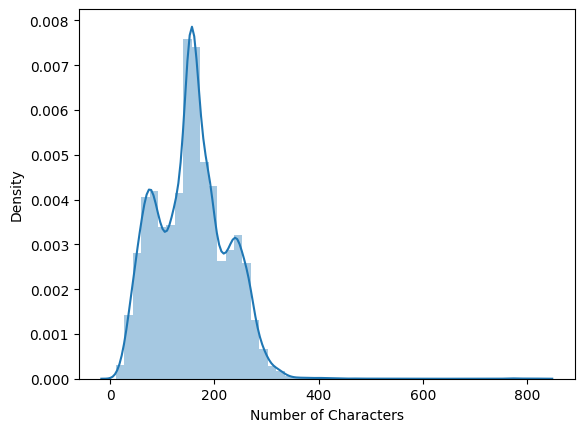

In [3]:
sns.distplot(df["Number of Characters"],  bins = 50)

In [4]:
df.describe()

,Risk Analysis,Number of Words,Reduced Number of Words,Number of Characters
count,20204.000000,20204.000000,20204.000000,20204.000000
mean,0.318105,27.298753,26.270194,156.270491
std,0.465752,12.000657,11.321358,67.403320
min,0.000000,2.000000,2.000000,11.000000
25%,0.000000,18.000000,17.000000,104.000000
50%,0.000000,27.000000,27.000000,156.000000
75%,1.000000,35.000000,33.000000,198.000000
max,1.000000,110.000000,105.000000,820.000000


In [5]:


nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
# Based Upon Risk Analysis + Tweets Bank Words or Compared Words of Overlap
word_bank = []
for index,rows in df.iterrows():
    Tweets = rows['Reduced Tweet']
    Risk = rows['Risk Analysis']
    
    if Risk == 1.0:
        for values in Tweets.split(" "):
            if values not in word_bank:
                word_bank.append(values)
    


In [7]:
new_word_bank = word_bank.copy()
for values in word_bank:
    if len(values) <= 3:
        new_word_bank.remove(values)
print("Number of Orginal Words in Bank: {}, \nNumber of Words in Bank After Edit: {}".format(len(word_bank), len(new_word_bank)))

Number of Orginal Words in Bank: 17345, 
Number of Words in Bank After Edit: 16057


In [11]:
from nltk.corpus import stopwords
import string

len(stopwords.words("english"))

179

In [12]:
for values in 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'